Bonus

In [26]:
import pandas as pd
from sqlalchemy import create_engine
import os
import matplotlib.pyplot as plt

In [10]:
engine = create_engine('postgresql://postgres:Gr@ham*1334@localhost:5432/sql-challenge')
connection = engine.connect()


In [20]:
employee_df = pd.read_sql("SELECT * FROM employees", engine)
employee_df = employee_df.rename(columns={"emp_title_id": "title_id"})
employee_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [15]:
salaries_df = pd.read_sql("SELECT * FROM salaries", engine)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [16]:
titles_df = pd.read_sql("SELECT * FROM titles", engine)
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [22]:
merged_df = pd.merge(employee_df, titles_df, on="title_id", how="left")
merged_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,Senior Engineer


In [25]:
all_merged_df = pd.merge(merged_df, salaries_df, on="emp_no", how="left")
#all_merged_df.head()
all_merged_df.count()

emp_no        300024
title_id      300024
birth_date    300024
first_name    300024
last_name     300024
sex           300024
hire_date     300024
title         300024
salary        300024
dtype: int64

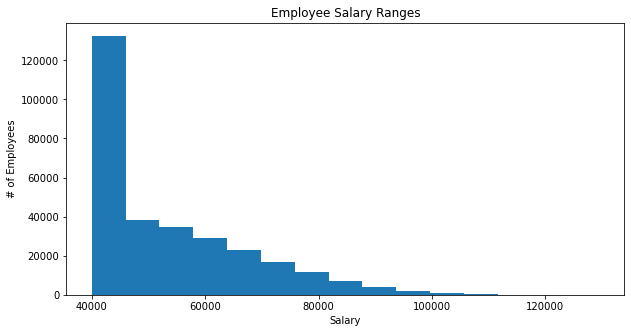

In [41]:
# histogram to visualize the most common salary ranges for employees

# Set the chart size
plt.figure(figsize=(10,5))

# Set the chart title
plt.title("Employee Salary Ranges")

# Set the X and Y axis labels
plt.xlabel("Salary")
plt.ylabel("# of Employees")

# Create the histogram
plt.hist(all_merged_df["salary"], bins=15)

# save the histogram
plt.savefig("Employee Salary Ranges.png")



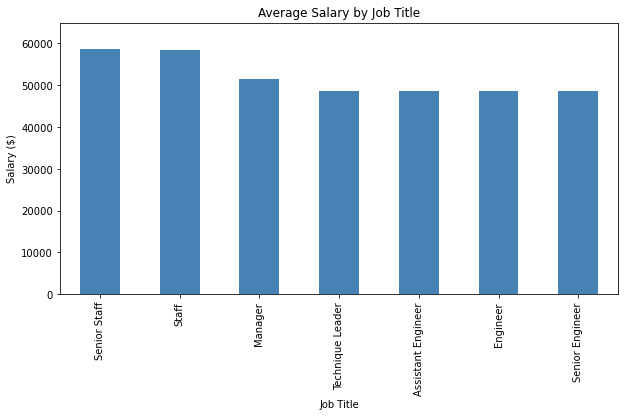

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [61]:
# bar chart of average salary by title

# Group by Title
grouped_title = all_merged_df.groupby(["title"])

#Calculate Average Salary
avg_salary = grouped_title["salary"].mean()

# Create a bar chart of the data
avg_salary = avg_salary.sort_values(ascending=False)
avg_salary.plot(figsize=(10,5), kind="bar", facecolor="steelblue")

# Set title and axis labels for the chart
plt.title("Average Salary by Job Title")
plt.ylabel("Salary ($)")
plt.xlabel("Job Title")

# Set the chart Y limits
plt.ylim(0, 65000)
    
plt.show()
plt.tight_layout